In [10]:
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

(4, 1)
(4,)


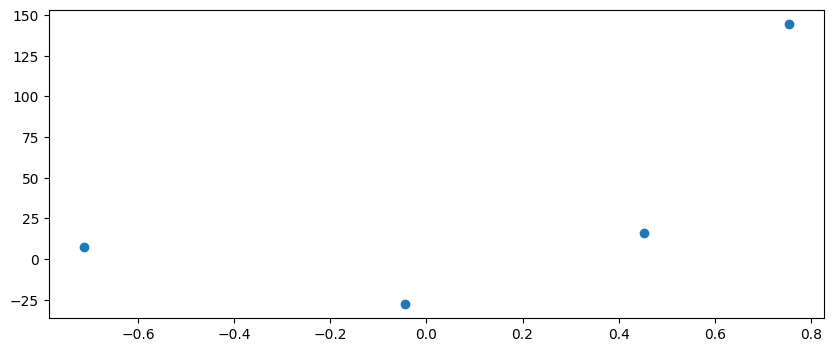

In [11]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)
print(X.shape)
print(y.shape)


plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.show()

COEFFICIENT (m) : [78.35063668]
INTERCEPT (b) : 26.15963284313262


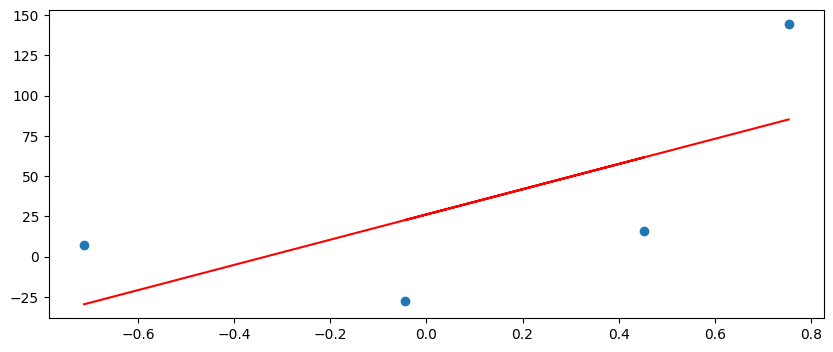

In [20]:
reg = LinearRegression()
reg.fit(X,y)

print('COEFFICIENT (m) :', reg.coef_)        # m
print('INTERCEPT (b) :', reg.intercept_)   # b

plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')
plt.show()

[ 44.18419163 135.39949674  96.51318381 159.05759577]


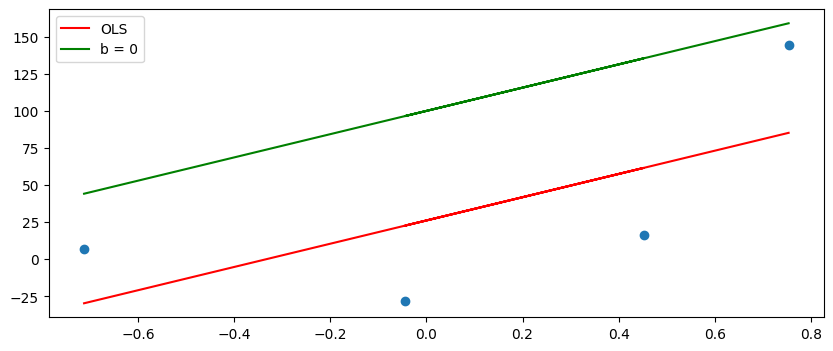

In [ ]:
# applying Gradient Descent assuming slope is constant m = 78.35
# and assuming the starting value for intercept b = 0 (where x=0)
y_pred = ((78.35 * X) + 100).reshape(4) # 1 row 4 columns   # y = mx + b


print(y_pred)

plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='r',label='OLS')
plt.plot(X,y_pred,color='g',label='b = 0')
plt.legend()
plt.show()

In [ ]:
print(X)
print(X.ravel())

[[-0.71239066]
 [ 0.45181234]
 [-0.04450308]
 [ 0.75376638]]
[-0.71239066  0.45181234 -0.04450308  0.75376638]


LOSS SLOPE 	:  590.7223659179078
STEP SIZE 	:  59.072236591790784
INTERCEPT 	: 40.927763408209216


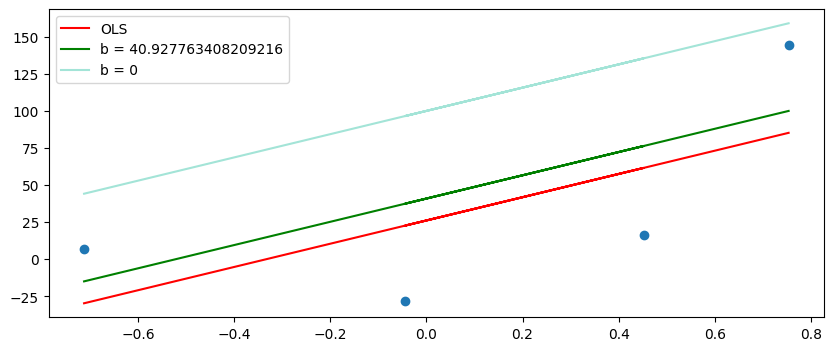

In [ ]:
m = 78.35
b = 100       # keep changing the value of b here, to see the different graph scenarios
# here we have taken b at random, so that we can find a point where loss function (loss_slope) is minimum

loss_slope = -2 * np.sum(y - (m*X.ravel() - b))      # acutual - predicted -- > [y - (y hat)] -- > [y - (m*X.ravel() - b)]
print('LOSS SLOPE \t: ', loss_slope)

# suppose taking learning rate = 0.1
lr = 0.1        # generally the value of learning rate is 0.1. You can can make it 0.01, 0.001, etc.
step_size = loss_slope * lr
print('STEP SIZE \t: ',step_size)

# calculating the new intercept
b = b - step_size                   # b new = b old - slope(m)
print('INTERCEPT \t:',b)


y_pred1 = ((m * X) + b).reshape(4)

plt.figure(figsize=(10,4))

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='g',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

LOSS SLOPE 	:  118.14447318358157
STEP SIZE 	:  11.814447318358157
INTERCEPT 	: 29.11331608985106


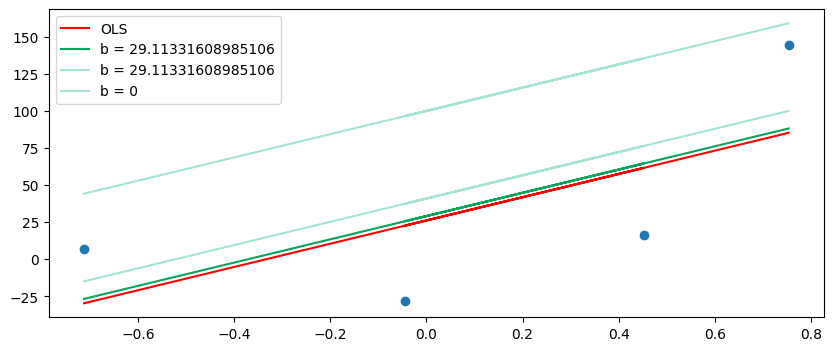

In [15]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)       # here value of b is updated
print('LOSS SLOPE \t: ', loss_slope)

step_size = loss_slope*lr
print('STEP SIZE \t: ',step_size)

b = b - step_size
print('INTERCEPT \t:',b)

y_pred2 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(10,4))

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))    # as you can the green line is almost on green line
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()


LOSS SLOPE 	:  23.62889463671634
STEP SIZE 	:  2.362889463671634
INTERCEPT 	: 26.750426626179426


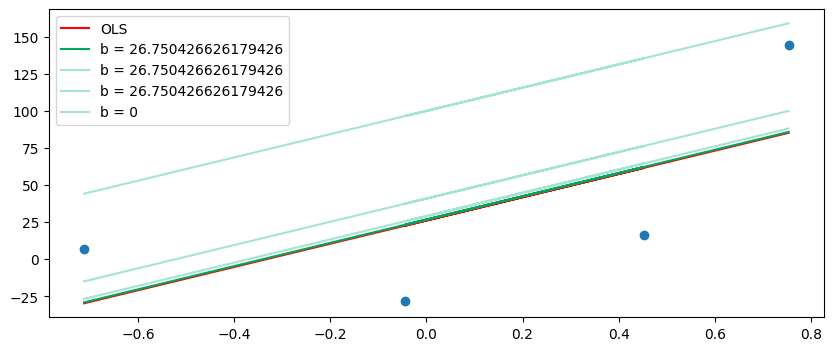

In [16]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)       # here value of b is updated again
print('LOSS SLOPE \t: ', loss_slope)

step_size = loss_slope*lr
print('STEP SIZE \t: ',step_size)

b = b - step_size
print('INTERCEPT \t:',b)

y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='r',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()